# Introduction:
This tutorial is going to teach you how to make interactive plots using the visualization library Bokeh. This library will help you create a variety of graphs and charts which will allow users to interact with and more easily spot relationships between plots. 

In situations where one dataset of points can be visualized in different ways, being able to create these relational charts can help you to look at multiple charts alongside one another to give you a better picture of the existence of potential trends in the data. Using Bokeh can also help make analyzing plots more efficiently. By implementing features such as hover, once a user sees data points of interest (ex: outliers), they can find further information of that data point directly on the graph rather than having to do more work by going back to parse the dataset.

A lot of the information in this tutorial is referenced from and can be looked further into at the site: http://bokeh.pydata.org/en/latest/

# Installation
Before using it, Bokeh needs to be installed, which can be done in one of two ways, either by using pip install or through Anaconda. The first option is done by running the command "pip install bokeh" on terminal while installing through Ancaonda can be done by running "conda install bokeh."

# Data Set & Imports
For this tutorial, we will look into a data set from Times Higher Education World University Ranking that have to deal with university rankings of 2603 universities across several different countries, including USA, Taiwan, France, Egypt, and others. This data set was downloaded from Kaggle at the link below.

At a high level the dataset ranks the universities as well as listing scores and other statistics, a few of which include teaching score, research score, the number of students, and male to female ratio. A full list of the parameters of the table can be found in the link.

https://www.kaggle.com/mylesoneill/world-university-rankings

If you are running this code, you will want to put the csv file of the data into the same folder as the tutorial, and run the following code block.

Several dependencies such as pandas and numpy will also be used, which we will include in our imports. We can store the data from the file into a pandas dataframe to work with for the rest of this tutorial.  

In [58]:
import pandas as pd 
import numpy as np 

rankings = pd.read_csv('timesData.csv')

# Take into account na values - replace with 0 
rankings = rankings.fillna(0)
# Replace the empty dashes with 0 as placeholder for graphs
rankings = rankings.replace("-", 0 )

# Getting Started - Inspecting Simple Plots
To get started, we will create a very simple plot in order to see how Bokeh works. As a start, we can look at a line plot of student-staff ratio and income for the top 10 ranked universities. 

By running the code block below, we see the basic interactive features of the graph with the mouse: We can pan across the plot, select a region to zoom in on (box zoom), zoom in based on the mouse location, save the plot, or reset any changes we have made to the plot. These features are found on the toolbar, which is by default located to the right of the graph (location can be changed).

These are the default interactions that can be done on the plot without adding any additionals tools, which we will go into later on. 

In [64]:
# Use the following imports 
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.charts import Bar

# Extract the data of interest and the variables of interest
top10 = rankings.head(n = 10)
print "How our dataset of only top 10 colleges look:"
print top10 
worldRank = top10["world_rank"]
research = top10["research"]

# Create a new plot with a title and axis labels
p = figure(title="", x_axis_label='World Rank', y_axis_label='Research')

# Add the line to the plot, specifying features of the graph 
p.line(worldRank, research, legend="Top 10 Colleges.", line_width=2)

# Display inline
output_notebook()
show(p)

How our dataset of only top 10 colleges look:
  world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   
6          6                   University of Oxford            United Kingdom   
7          8     University of California, Berkeley  United States of America   
8          9                Imperial College London            United Kingdom   
9         10                        Yale University  United States of America   

   teaching international  research  citations income total_sc

Loading BokehJS ...

# Scatter Plots
Scatter plots are a popular choice for visualizing data, and are pretty simple to create. One of the cool features that you can add to the toolbox is the hover tool, which allows the user to hover over a data point with their mouse and be able to look into more information about that data point on the spot. The information that the user wants to be able to see when hovering over the data can be specified in the code. Since most of the interactive features of Bokeh are implemented on scatter plots, most of the plots in this tutorial will be dealing with scatter plots.

First, we start by creating a basic scatter plot of the data by using the Scatter function (without hover).

In [6]:
from bokeh.charts import Scatter
from bokeh.io import output_notebook

# Create the plot
plot = Scatter(top10, x='citations', xlabel = "Citations", 
               ylabel = "# Students", y = 'num_students', color='violet',
               legend='top_left', title='Basic Scatterplot')

# Display inline
output_notebook()
show(plot)

Loading BokehJS ...

Initially, we see that there seems to be some sort of negative relationship between citations and number of students amongst the top 10 schools. Looking at the graph, one might be curious to see what school corresponds to the highest number of students at 11,751 and what its ranking is. Which points correspond to the which schools? We can do this in Bokeh by adding the hover tool into the toolbox.  

Using the hover tool, we want to display the school as well as its ranking as we hover over the data point, which we implement below. We demonstrate this on a plot of research vs. citations.

In [73]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Import the top10 dataframe as ColumnDataSource
source = ColumnDataSource(data=top10)

# Variables we want to show in the hover: university name and ranking
hover = HoverTool(tooltips=[("School", "@university_name"), ("Rank", "@world_rank")])

# Initialize the plot size and titles
p = figure(plot_width=600, plot_height=600, tools=[hover],
           title="Scatterplot with Hover Tool", x_axis_label = "Citations", 
           y_axis_label = "# Students", x_range = (88,101))

# Draw out the data points
p.circle(top10["citations"], top10["research"], size=15, source=source)

# Display inline
output_notebook()
show(p)

Loading BokehJS ...

# Highlighting by color
Another nice feature of Bokeh is that you can highlight points by color. Similar to hovering, this can be used on scatterplots to identify clusters by visually looking at the graph without having to dig back into the dataset to find more information about a specific point.  

As an example, we could create a scatterplot of our data and color the datapoints based on the country that the college is located in. For the sake of simplicity, lets say that we were interested in visualizing colleges from the top three occuring countries in the dataset. After cleaning and graphing our data, our plot would allow us to quickly check if certain countries (colors) were commonly grouped together at certain areas compared to other countries. 

In [81]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

# Find the top three countries that occur in the data set and index out these rows 
rankingsCount = rankings['country'].value_counts()
rankedCountries = rankingsCount.head(n=3)
topThreeSet = set(rankedCountries.index)
idx = rankings["country"].isin(topThreeSet)
topThreeDf = rankings[idx]
print "These are the top three countries that we will be looking into based on occurences in the dataframe:"
print topThreeSet

# Specify the color scheme for the plot - assign each country to a color
colormap = {'United States of America': 'red', 'United Kingdom': 'green', 
            'Germany': 'blue'}
colors = [colormap[x] for x in topThreeDf["country"]]

# Import the top10 dataframe as ColumnDataSource
source = ColumnDataSource(data=topThreeDf)

# Variables we want to show in the hover: university name and ranking
hover = HoverTool(tooltips=[("School", "@university_name"), ("Rank", "@world_rank"), ("Country", "@country")])

# Add in labels to the graph
p = figure(title = "Research vs. Num. Of Students", tools = [hover, "resize", "box_zoom"], x_range = (-1,93))
p.xaxis.axis_label = 'Student Staff Ratio'
p.yaxis.axis_label = 'Research'

# Plot the points for the graph
p.circle(topThreeDf["student_staff_ratio"], topThreeDf["research"],
         color=colors, fill_alpha=0.2, size=10, source = source)

# Display inline
output_notebook()
show(p)

These are the top three countries that we will be looking into based on occurences in the dataframe:
set(['United Kingdom', 'Germany', 'United States of America'])


Loading BokehJS ...

By looking at the output of this scatterplot, we can easily see that there exists a group of values that are colored blue, which compared to the general distribution, have a significantly higher student to staff ratio and a lower research score. We know that these schools correspond to universities from Germany.

# Linked Brushing 
In certain cases, we can link together several plots in order to look at several bivariate relationships together. Across all of these graphs, if we identify specific points of interest on a certain graph, we can use Bokeh's linked brushing tool to help us see where specific points lie on other graphs.

For our given set, we can generate three scatterplots and identify each bullet point based on the college name. As we highlight specific colleges on one scatterplot, we can see where that school would be on the other graphs as well. Lets say that we want to make three scatterplots based on income, where we are curious to see the bivariate relationships between income and citations, income and research, and income and total score. We need to use the gridplot function to generate multiple figure objects. 

For better readability in the plots, we will limit our output to the top 100 colleges. A lot of the missing values for income were recorded as "-", which we replaced with 0. Obviously, since there shouldn't be any colleges with 0 income, we will decided to exlcude these points when we plot our graph. After generating the graph, use the box select or lasso select tool to try selecting points on any graph, and these points will also be highlighted on the other two graphs.

In [82]:
from bokeh.plotting import figure
from bokeh.io import gridplot
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxSelectTool

# Take away 0 income data 
top100 = rankings.head(n=100)
exclude0 = top100[top100["income"] != 0]
x = exclude0["income"]

plot_options=dict(responsive=True, width=300, height=300)

# create shared column data source for all plots
source = ColumnDataSource(data=dict(x=x, y1=exclude0["citations"], y2=exclude0["research"], y3=exclude0["total_score"], 
                          school=exclude0["university_name"], rank =exclude0["world_rank"]))

# Variables we want to show in the hover: university name and ranking - need one hovertool for each graph
hover = HoverTool(tooltips=[("School", "@school"), ("Rank", "@rank")])
hover2 = HoverTool(tooltips=[("School", "@school"), ("Rank", "@rank")])
hover3 = HoverTool(tooltips=[("School", "@school"), ("Rank", "@rank")])

TOOLS = "reset,box_select,lasso_select,help"

# create first plot - Citations vs. Income
s1 = figure(tools=TOOLS, **plot_options)
s1.add_tools(hover)
s1.circle('x', 'y1', size=10, color="navy", alpha=0.5, source = source)
s1.xaxis.axis_label = 'Income'
s1.yaxis.axis_label = 'Citations'

# create second plot - Research vs. Income
s2 = figure(tools=TOOLS, **plot_options)
s2.add_tools(hover2)
s2.circle('x', 'y2', size=10, color="purple", alpha=0.5, source = source)
s2.xaxis.axis_label = 'Income'
s2.yaxis.axis_label = 'Research'

# create third plot - Score vs. Income
s3 = figure(tools=TOOLS, **plot_options)
s3.add_tools(hover3)
s3.circle('x', 'y3', size=10, color="black", alpha=0.5, source = source)
s3.xaxis.axis_label = 'Income'
s3.yaxis.axis_label = 'Total Score'

# put all the plots in HBox
p = gridplot([[s1, s2, s3]], toolbar_location='right', title = "Linked Brushing: Use Box or Lasso Select")

# Display inline
output_notebook()
show(p)

Loading BokehJS ...

# More Bokeh Interactions - Tap tool
The following code demonstrates another interactive feature that is possible on Bokeh, called the tap tool. In this example, if we wanted to plot a few schools in a scatterplot, we can have it linked so that when the user clicks on one of the points, a new tab linking to that school's website pops up. 

In [113]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool
from bokeh.plotting import figure, show


p = figure(plot_width=500, plot_height=400,
           tools="tap", title="Scatterplot with Click Interaction",
           x_axis_label = "International", y_axis_label = "Citations", x_range = (28,93), y_range = (90,101))

source = ColumnDataSource(data=dict(
    x=[72.4, 82.3, 29.5, 54.6, 89.7],
    y=[98.8, 99.9, 99.2, 99.9, 91.5],
    college=["harvard", "mit", "stanford", "caltech", "yale"]
    ))

p.circle('x', 'y', size=20, source=source)

url = "http://www.@college.edu"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

output_notebook()
show(p)
	

Loading BokehJS ...

# Bokeh vs Matplotlib
Here, we will compare the differences and similarities between Bokeh and Matplotlib. According to the documentation (http://matplotlib.org/index.html), "matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms." Matplotlib can be used in python scripts to visualize data. Matplotlib is the original and oldest python library, as it was first created in 2002. Originally, it was designed to resemble MATLAB. A downside of Matplotlib is that its not easy to quickly generating simple plots, and that the layout and looks of the plots are not very appealing unless you take time to modify it yourself. However, there are newer packages that have been built on top of Matplotlib such as Seaborn and Ggplot, which provide more aesthetically appealing default plot visuals. Another downside is that a lot of the interactive features, such as as the animation toolkit, does not work on the MacOSX backend. 

Compared to Matplotlib, one of the biggest upsides to Bokeh is its ease in generating simple plots quickly. Another advantage is the fact that you can output plots as many different objects, such as JSON, interactive web application, or HTML, making adding Bokeh plots to webpages extremely easy. As shown in the examples above, Bokeh's interactive plots, which are designed for modern web browsers, are what set it apart. Additionally, another cool plot that can be created on Bokeh is a web-enabled graph, which can create graphs based on pulling in real-time data. Building these interactive plots can be helpful for "playing around" with the data and inspecting the data for trends. However, a downside is that Bokeh is still undergoing a lot of new updates and changes, so a lot of the commands you learn now may not be the same in the future, whereas matplotlib has been around a lot longer and is more solidified. 

# Example of a Matplotlib Histogram
The following example gives an example of a basic histogram created in Matplotlib.

In [105]:
import matplotlib
# Improves quality quality
matplotlib.use("svg")
# Prints the output in the notebook 
%matplotlib inline

import matplotlib.pyplot as plt
# To show default settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# Changes the plot size 
matplotlib.rcParams['figure.figsize'] = (10, 5)

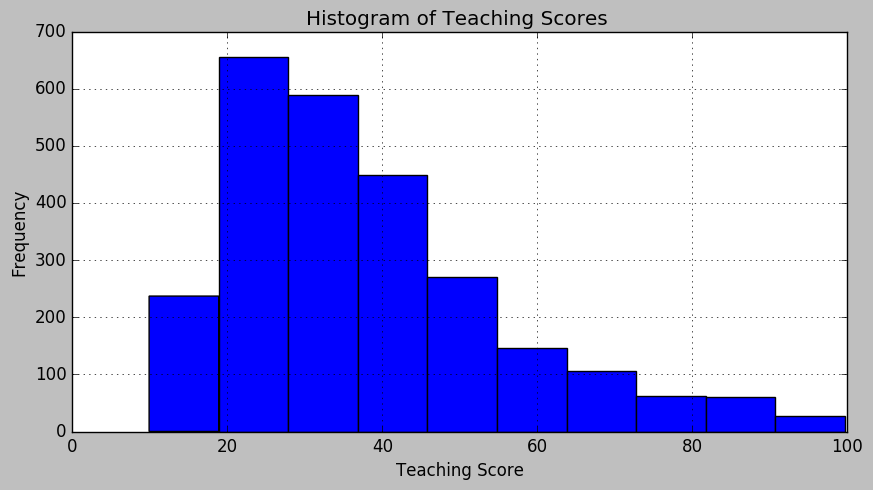

In [106]:
n, bins, patches = plt.hist(rankings["teaching"])
plt.xlabel('Teaching Score')
plt.ylabel('Frequency')
plt.title('Histogram of Teaching Scores ')
plt.grid(True)
plt.show()

As you see the default setting does not show the prettiest plot... but as Eric Wong demonstrated in class, there are packages such as ggplot that can help it look better.

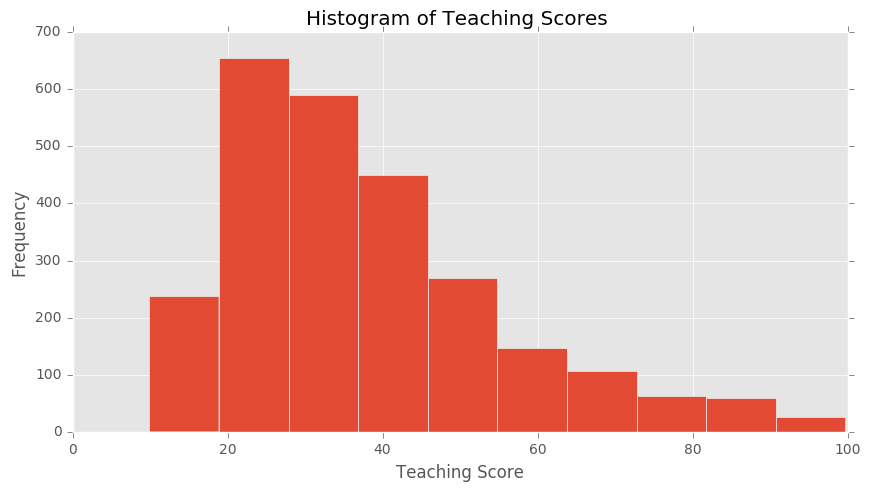

In [108]:
n, bins, patches = plt.hist(rankings["teaching"])
plt.style.use('ggplot')
plt.xlabel('Teaching Score')
plt.ylabel('Frequency')
plt.title('Histogram of Teaching Scores ')
plt.grid(True)
plt.show()

# Matplotlib Scatterplot
Here is how making a scatterplot would look in matplotlib. With so many points, we can see here that the interactions that are automatically loaded into Bokeh (such as zoom) could be of help here.

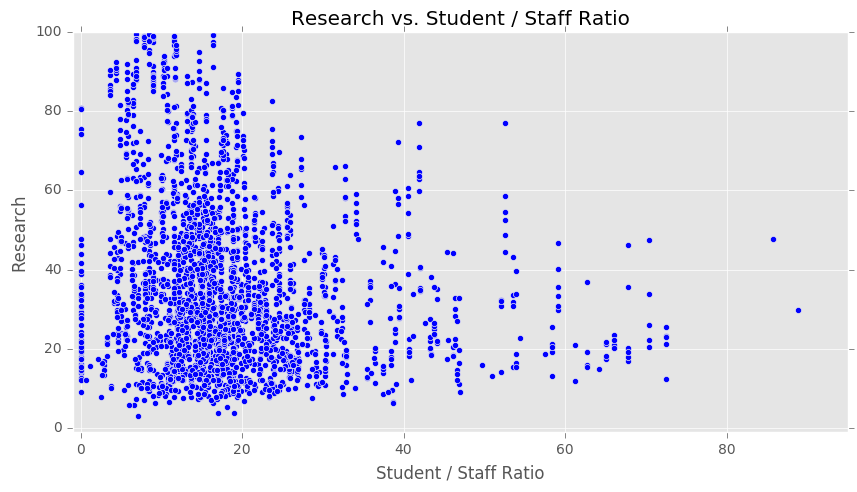

In [14]:
plt.scatter(rankings["student_staff_ratio"], rankings["research"])
plt.xlabel('Student / Staff Ratio')
plt.ylabel('Research')
plt.title('Research vs. Student / Staff Ratio')
plt.xlim(-1, 95)
plt.ylim(-1, 100)
plt.show()

# Bokeh Histogram
We've already seen plenty of examples of scatterplots and their features in this tutorial. To compare side by side with matplotlib, below is how you would make a histogram in Bokeh. As you can see it does not take much effort to get a good looking plot, with basic interactions already loaded in the right side bar without specifying any commands necessary.

In [16]:
from bokeh.charts import Histogram
hist = Histogram(rankings['teaching'], title = "Histogram of Teaching Scores")
hist.xaxis.axis_label = 'Teaching'
hist.yaxis.axis_label = 'Count'
# Display inline
output_notebook()
show(hist)

Loading BokehJS ...

Though there doesn't seem to have too much complexity in creating the above plots in matplotlib, there are instances in which matplotlib code isn't so simple. An example of this is creating faceting plots. We will not implement it in this notebook directly, but an example can be found here under the faceting section: http://blog.yhat.com/posts/ggplot-for-python.html 

# Conclusion
With new development over time, there have also been packages such as plotly that are built to work with Matplotlib, that also try to build interactive plots. As packages become more and more advanced, different types of visualizations and plots are becoming possible in multiple languages and packages, making the distinction between different packages less and less clear. The main difference will mostly likely come down to familiarity and personal preference. For example, some languages are built ontop of R (ggplot), so users more familiar with R may find it more comfortable for them to use ggplot. Though everyone will have their own personal preferences, I personally would rather work with Bokeh because its code is a lot cleaner and easier to work with, and its easier to create simple graphs quickly, as its default visuals look so much better.

As this tutorial has shown, Bokeh can be useful in creating interactions in which users can generate plots that they can interact with, allowing them to be able to inspect data points and find patterns more quickly. The features that were implemented in this tutorial can be combined with other features into the same graph. There are several other plots and graphs that were not discussed in this tutorial, but hopefully this tutorial has given you a good understanding of some of the things that are possible in Bokeh.